
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**:

**Rol**:

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["data"].shape

(1797, 64)

In [5]:
digits_dict.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

### RESPUESTA 1

Veamos primero con que tipo de datos se está trabajando

In [7]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

In [8]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Veamos la frecuencia de cada uno de los digitos

In [9]:
targets = digits.groupby('target').count()['c00']
targets

target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: c00, dtype: int64

Veamos lo anterior gráficamente

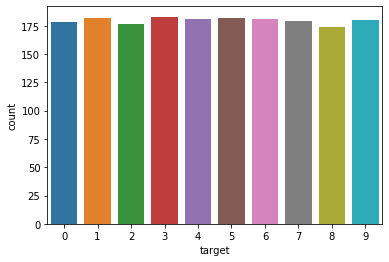

In [10]:
import seaborn as sns
sns.countplot(x='target',data=digits)

In [11]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

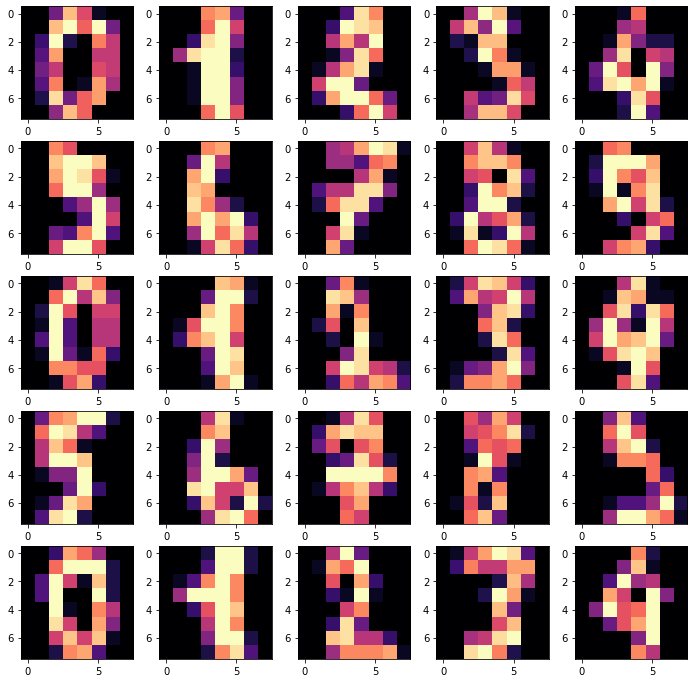

In [15]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for x in range(0,5):
    for y in range(0,5):
        axs[x,y].imshow(digits_dict['images'][5*x+y], cmap = 'magma')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [16]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

print('Largo del conjunto de entrenamiento: ', len(X_train))
print('Largo del conjunto de testeo: ', len(X_test))

Largo del conjunto de entrenamiento:  1347
Largo del conjunto de testeo:  450


### 3.a Regresión Logística

In [19]:
from metrics_classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [27]:
log = LogisticRegression()
param = {'penalty': ['l1', 'l2'],'random_state': [0,2000], 'C':[1,2,3,4,5], 'solver':[ 'liblinear']}
log_grid = GridSearchCV(estimator = log, param_grid = param)
log_grid.fit(X_train, y_train)
print('Los mejores parametros son: ', log_grid.best_params_)
print('La precisión es de: ', log_grid.best_score_)

Los mejores parametros son:  {'C': 2, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
La precisión es de:  0.9457937491394741


In [54]:
log_final = log_grid.best_estimator_
log_final.fit(X_train, y_train)
y_pred = log_final.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))


df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred
        }
)

df_metrics1 = summary_metrics(df_temp)

print("\nMetricas obtenidas: ")
print("")
print(df_metrics1)



Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  1  0  0  1  0]
 [ 0  0  0  0 44  0  0  0  0  1]
 [ 0  1  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  1  0 46  0  0  0]
 [ 0  1  0  0  1  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  1  0  1  2 59]]

Metricas obtenidas: 

   accuracy  recall  precision  fscore
0    0.9644  0.9672      0.964   0.965


### 3.b K-Nearest

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
kn = KNeighborsClassifier()
param = {'n_neighbors' : [3, 5, 8,10, 15, 20],
         "leaf_size":[10,20,30,40], 
         'weights' : ['uniform', 'distance'],
         "p":[1,2,3],
          }
kn_grid = GridSearchCV(estimator = kn, param_grid = param)
kn_grid.fit(X_train, y_train)
print('Los mejores parametros son: ', kn_grid.best_params_)
print('La precisión es de: ', kn_grid.best_score_)

Los mejores parametros son:  {'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
La precisión es de:  0.985892881729313


In [55]:
kn_final = kn_grid.best_estimator_
kn_final.fit(X_train, y_train)
y_pred = kn_final.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))


df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred
        }
)

df_metrics2 = summary_metrics(df_temp)
print("\nMetricas obtenidas: ")
print("")
print(df_metrics2)


Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  2  0  0  0  0  0  0 46  0]
 [ 0  1  0  2  0  0  0  0  0 60]]

Metricas obtenidas: 

   accuracy  recall  precision  fscore     Modelo
0    0.9889  0.9911     0.9871  0.9888  K-Nearest


### 3.c  SVM

In [81]:
from sklearn import svm
from sklearn.svm import SVC

In [64]:
svm = svm.SVC()
params = {'kernel' :('linear','poly','rbf', 'sigmoid') , 'C':range(1,10)}
svm_grid = GridSearchCV(estimator = svm, param_grid = params)
svm_grid.fit(X_train, y_train)
print('Los mejores parametros son: ', svm_grid.best_params_)
print('La precisión es de: ', svm_grid.best_score_)

Los mejores parametros son:  {'C': 7, 'kernel': 'rbf'}
La precisión es de:  0.9873771168938456


In [65]:
svm_final = svm_grid.best_estimator_
svm_final.fit(X_train, y_train)
y_pred = svm_final.predict(X_test)

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_test,y_pred))


df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat':y_pred
        }
)

df_metrics3 = summary_metrics(df_temp)
print("\nMetricas obtenidas: ")
print("")
print(df_metrics3)


Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  1 41  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  1  0  0  0 62]]

Metricas obtenidas: 

   accuracy  recall  precision  fscore
0    0.9933  0.9936     0.9933  0.9934


In [66]:
comparacion = []
comparacion.append(df_metrics1)
comparacion.append(df_metrics2)
comparacion.append(df_metrics3)
comparacion = pd.concat(comparacion)
comparacion['Modelo'] = ['Regresión Logística','K-Nearest','SVM']
comparacion

,accuracy,recall,precision,fscore,Modelo
0,0.9644,0.9672,0.9640,0.9650,Regresión Logística
0,0.9889,0.9911,0.9871,0.9888,K-Nearest
0,0.9933,0.9936,0.9933,0.9934,SVM


De lo anterior es posible notar que el modelo con mejor rendimiento es el SVM.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

In [74]:
scores = cross_val_score(svm_final, X, y, cv=10)
print('Precisión: ', round(scores.mean(),2 ),'+/-', round(scores.std() * 2), 2)

Precisión:  0.98 +/- 0.0 2


### Curva de Validación

In [76]:
from sklearn.model_selection import validation_curve

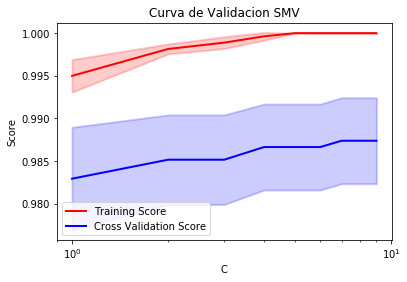

In [84]:
from sklearn import svm
from sklearn.svm import SVC


model = svm.SVC(C= 7, kernel= 'rbf')
parameters = np.arange(1,10)
train_scores, test_scores = validation_curve(model,
                                             X_train,
                                             y_train,
                                             param_name = 'C',
                                             param_range = parameters,
                                             scoring = 'accuracy',
                                             n_jobs = 1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.title('Curva de Validacion SMV')
plt.xlabel('C')
plt.ylabel('Score')
plt.semilogx(parameters,
             train_scores_mean,
             label = 'Training Score',
             color = 'red',
             lw =2)
plt.fill_between(parameters,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.2,
                 color = 'red',
                 lw = 2)

#Test
plt.semilogx(parameters,
             test_scores_mean,
             label = 'Cross Validation Score',
             color = 'blue',
             lw =2)
plt.fill_between(parameters,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.2,
                 color = 'blue',
                 lw = 2)

plt.legend(loc="best")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

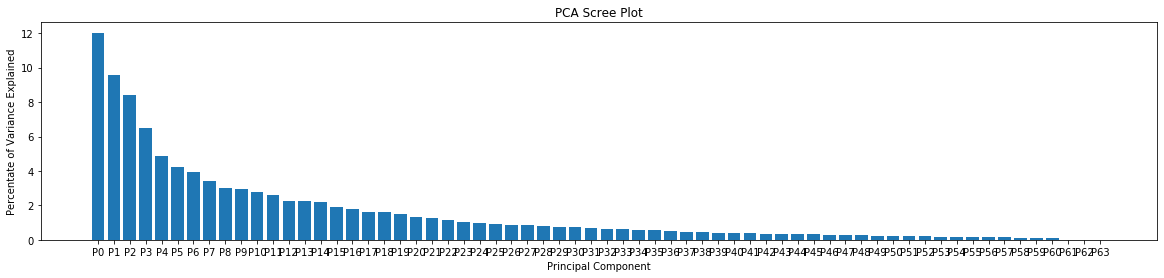

In [92]:
x = StandardScaler().fit_transform(X)

n_components = 64
pca = PCA(n_components)
principalComponents = pca.fit_transform(x)

# Graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [ 'P'+str(i) for i in range(n_components)]

plt.figure(figsize=(20,4))
plt.bar(x= range(0,n_components), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


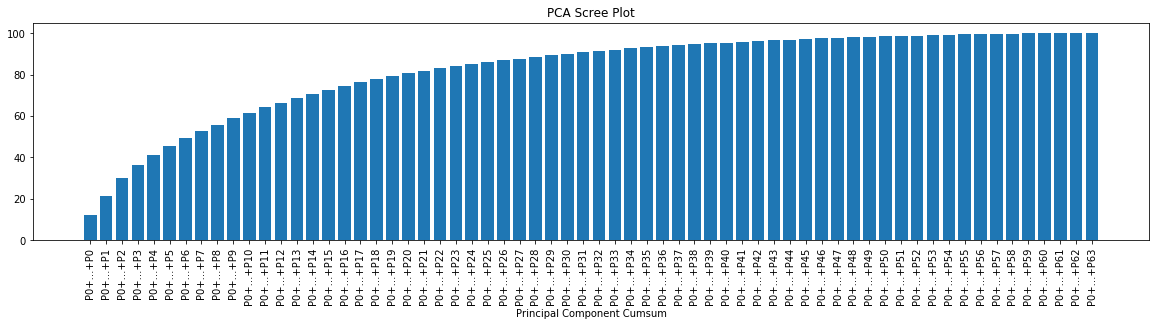

In [93]:
# graficar varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = [ 'P' + str(0) + '+...+P' + str(i) for i in range(n_components) ]

plt.figure(figsize=(20,4))
plt.bar(x= range(0,n_components), height=percent_variance_cum, tick_label=columns)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [95]:
print('Considerando las primeras 40 componentes principales la varianza explicada de las variables se puede explicar en un', percent_variance_cum[40], '%')

Considerando las primeras 40 componentes principales la varianza explicada de las variables se puede explicar en un 95.49 %


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [116]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test
    y_aux_true = y_test
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

C:\Users\martin\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


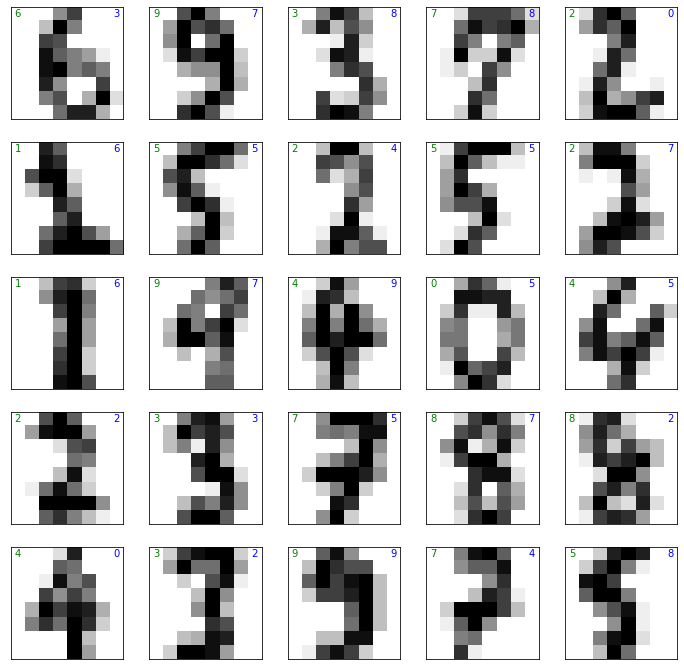

In [131]:
mostar_resultados(digits,svm_final,nx=5, ny=5,label = "correctos")

C:\Users\martin\anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


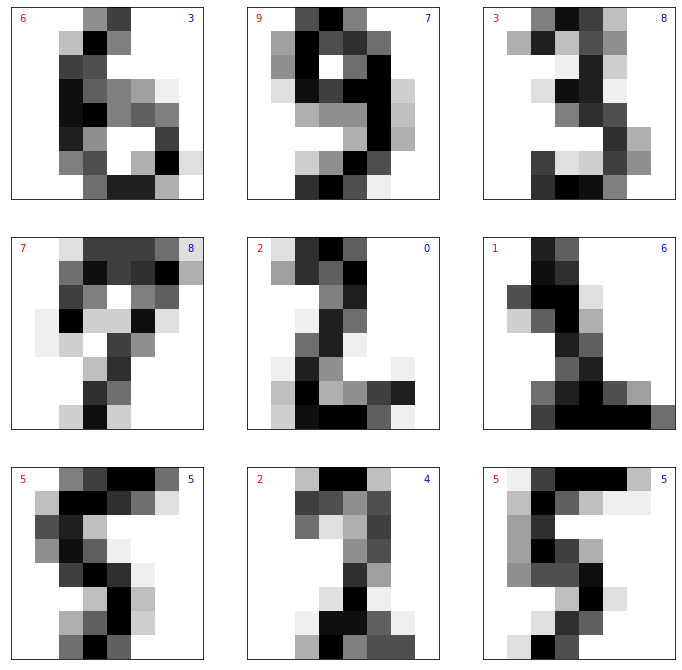

In [133]:
mostar_resultados(digits,svm_final,nx=3, ny=3,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Como comentarios finales, se puede ver que los modelos aplicados obtuvieron metricas aceptables (sobre el 0,9%), en la muestra de resultados
finales veo que hay valores mal clasificados, no pude entender por qué me ocurre esto por falta de tiempo estos dias. Como trabajos futuros me gustaría aplicar modelos de redes convolucionales para comparar resultados.